In [1]:
## Libraries

import os
import SimpleITK as sitk
import cv2
import pydicom
import numpy as np
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter import filedialog
from PIL import Image

In [16]:
## Functions

def loadFile(filename):
    ds = sitk.ReadImage(filename)
    img_array = sitk.GetArrayFromImage(ds)
#     frame_num, width, height = img_array.shape
    return img_array

def loadFileInformation(filename):
    information = {}
    ds = pydicom.read_file(filename)
    
    information['PatientID'] = ds.PatientID
    information['PatientName'] = ds.PatientName
    information['PatientBirthDate'] = ds.PatientBirthDate
    information['PatientSex'] = ds.PatientSex
    information['StudyID'] = ds.StudyID
    information['StudyDate'] = ds.StudyDate
    information['StudyTime'] = ds.StudyTime
    information['InstitutionName'] = ds.InstitutionName
    information['Manufacturer'] = ds.Manufacturer
#     information['NumberOfFrames'] =ds.NumberOfFrames
    
    return information

def showImage(img_array, frame_num = 0):
    img_bitmap = Image.fromarray(img_array[frame_num])
    return img_bitmap

# 调整CT图像的窗宽窗位
def setDicomWinWidthWinCenter(img_gray, window_center, window_width):
    pixel_val = img_gray.copy()
    
    win_min = window_center - window_width/2.0 + 0.5
    win_max = window_center + window_width/2.0 + 0.5
    nPixelVal = (pixel_val - win_min)*255.0/(win_max - win_min)

    nPixelVal[nPixelVal < 0] = 0
    nPixelVal[nPixelVal > 255] = 255
    
    img_array_window = np.asarray(nPixelVal).astype(np.int)
    return img_array_window

def autoEqualize(img_array):
    img_array_list = [cv2.equalizeHist(img) for img in img_array]
    img_array_equalized = np.asarray(img_array_list)
    return img_array_equalized

def limitedEqualize(img_array, limit=4.0):
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(8,8))  #CLAHE (Contrast Limited Adaptive Histogram Equalization)
    img_array_list = [clahe.apply(img) for img in img_array]
    img_array_limited_equalized = np.asarray(img_array_list)
    return img_array_limited_equalized   

def writeVideo(img_array, directory, filename):
    frame_num, width, height = img_array.shape
    filename_output = os.path.join(directory, os.path.splitext(os.path.basename(filename))[0] + '.avi')
    video = cv2.VideoWriter(filename_output, -1, 15, (width, height)) # Initialize Video File
    for img in img_array:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        video.write(img_rgb) # Write video file frame by frame
    video.release()

In [17]:
# filename1 = 'D:/SampleData/US/3dus-breast-xizhong/data_dicom/9509758/201108101525490000/2.16.840.1.114241.2.10009080000080520110810222549.2.1'
# filename2 = 'D:/SampleData/US/3dus-breast-xizhong/data_dicom/9509758/201108101525490000/2.16.840.1.114241.2.10009080000080520110810222549.2.2'
filename = '/home/sakulaki/yolo-yuli/tct/pneumoconiosis/samples/01.DCM'

In [19]:
img_array = loadFile(filename)
frame_num, width, height = img_array.shape

information = loadFileInformation(filename)
print(information)

img_array_limited_equalized = limitedEqualize(img_array, limit=8.0)

{'PatientName': '³¾·Î', 'InstitutionName': 'zhan', 'StudyDate': '20180930', 'PatientBirthDate': '20180930', 'StudyTime': '143856', 'StudyID': '1', 'PatientID': '³¾·Î', 'PatientSex': 'M', 'Manufacturer': 'ANGELL'}
1


0 255


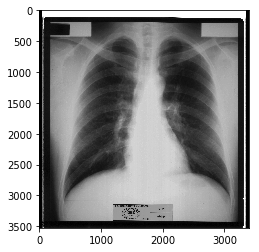

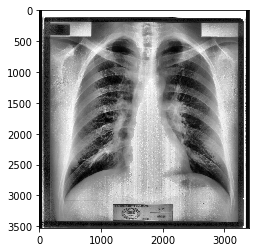

In [20]:
print(np.min(img_array_limited_equalized[0]), np.max(img_array_limited_equalized[0]))

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_array[0], cmap = plt.cm.gray)
plt.show()
plt.imshow(img_array_limited_equalized[0], cmap = plt.cm.gray)
plt.show()

In [21]:
plt.imshow(data, cmap = plt.cm.gray)
plt.show()

thesh = 40000

maskd = data.copy()
maskd[data > thesh] = 255
maskd[data <= thesh] = 0
plt.imshow(maskd, cmap = plt.cm.gray)
plt.show()

NameError: name 'data' is not defined

In [ ]:
# 白色中有小黑点，去除小黑点
morph_close = cv2.morphologyEx(maskd, cv2.MORPH_CLOSE, (9, 9))
# 黑色中有小白点，去除小白点
morph_open = cv2.morphologyEx(morph_close, cv2.MORPH_OPEN, (9, 9))

plt.imshow(morph_close, cmap = plt.cm.gray)
plt.show()
plt.imshow(morph_open, cmap = plt.cm.gray)
plt.show()